# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#Import libraries we may need

In [2]:
# Specify the file path to the Excel file
file_path = r'C:/Users/kruvi/Desktop/programs/python/CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail/Online_Retail.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first 5 rows of the data to ensure it loaded correctly
data.head()
# Display the lest 5 rows of the data to ensure it loaded correctly
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## **Preliminary analysis of the data prior to cleaning**

In [7]:
#Describeing the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We've observed that 'Quantity' and 'UnitPrice' contain negative values in a few transactions, which may indicate product returns or refunds. We will investigate this further to understand its significance and decide whether to remove these entries. If they represent returns, the same transactions should appear as positive values from the buyer's perspective, making the negative entries redundant.

In [17]:
#View the properties of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


As we can see, all columns except for 'CustomerID' and 'Description' have the same number of non-null entries. Missing descriptions could lead to errors, but since there are very few such cases, we will remove those rows later. We are not focusing on individual customers, so purchases without a 'CustomerID' are unlikely to cause issues, especially as we can see that many purchases are made by anonymous customers.

### Find the unique values in each colum

In [24]:
# Display all unique values in the "Description" column
unique_descriptions = data['Description'].unique()

# Show the unique values
print("A list of unique values:", unique_descriptions)
# Show the number of unique values
print("We have ", len(unique_descriptions), " unique description values")

A list of unique values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
We have  4224  unique description values


As we can see, there are many different types of products in the dataset.

In [25]:
# Display all unique values in the "Country" column
unique_Countrys = data['Country'].unique()

# Show the unique values
print("A list of countrys:", unique_Countrys)
# Show the number of difrants countrys
print("We have ", len(unique_Countrys), " unique description values")

A list of countrys: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
We have  38  unique description values


In [28]:
#Chack with there are duplicates.
# Transpose the DataFrame so that columns become rows, and then drop duplicates
duplicates = data.T.duplicated()

# Print the names of duplicate columns
duplicate_columns = data.columns[duplicates].tolist()

if duplicate_columns:
    print("Duplicate columns found:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


## Cleaning the data

Let's begin by examining the percentage of extreme values in our dataset.

In [33]:
# Count the number of rows where 'Quantity' is less than 0
less_than_zero = (data['Quantity'] < 0).sum()

# Count the number of rows where 'Quantity' is greater than 20
greater_than_twenty = (data['Quantity'] > 20).sum()

# Print the results
print(f"Number of rows with 'Quantity' less than 0: {less_than_zero}")
print(f"Number of rows with 'Quantity' greater than 20: {greater_than_twenty}")


Number of rows with 'Quantity' less than 0: 10624
Number of rows with 'Quantity' greater than 20: 57091


We will check if the negative values in the 'Quantity' column represent sales that correspond to positive values in a different row.

In [34]:
# Filter rows with negative 'Quantity' values
negative_quantity_rows = data[data['Quantity'] < 0]

# Initialize a counter for matching rows
matching_rows = 0

# Iterate through the negative quantity rows
for index, row in negative_quantity_rows.iterrows():
    # Create a filter for matching positive quantity rows with the same 'UnitPrice' and 'Description'
    match_filter = (
        (data['Quantity'] == -row['Quantity']) &  # Check for positive quantity
        (data['UnitPrice'] == row['UnitPrice']) &  # Same 'UnitPrice'
        (data['Description'] == row['Description'])  # Same 'Description'
    )
    
    # Check if any matching rows exist
    if data[match_filter].shape[0] > 0:
        matching_rows += 1

# Output the result
print(f"Number of negative 'Quantity' rows with matching positive counterpart: {matching_rows}")


Number of negative 'Quantity' rows with matching positive counterpart: 7522


We observe that the majority of rows with negative 'Quantity' have a corresponding positive counterpart. This suggests that most of these entries represent sales, allowing us to focus on the purchase entries and disregard the sales rows.

In [95]:
# Remove rows where 'Quantity' is negative
filtered_data = data[data['Quantity'] >= 0]

# Display the number of remaining rows in the new filtered data
print(f"Number of rows after filtering: {len(filtered_data)}")

Number of rows after filtering: 531285


We also observe a small number of large-quantity purchases (defined as those exceeding 20 units). To prevent these outliers from skewing our calculations, we will exclude them from the analysis.

In [96]:
# Remove rows where 'Quantity' is to large
filtered_data = filtered_data[filtered_data['Quantity'] <= 20]

# Display the number of remaining rows in the new filtered data
print(f"Number of rows after filtering: {len(filtered_data)}")

Number of rows after filtering: 474194


Now we will do similer filtering with the coulum "UnitPrice"

In [43]:
# Count the number of rows where 'UnitPrice' is less than 0
less_than_zero = (filtered_data['UnitPrice'] < 0).sum()

# Count the number of rows where 'UnitPrice' is 0
equal_to_zero = (filtered_data['UnitPrice'] == 0).sum()

# Count the number of rows where 'UnitPrice' is greater than 20
greater_than_thousand = (filtered_data['UnitPrice'] > 1000).sum()

# Print the results
print(f"Number of rows with 'Quantity' less then 0: {less_than_zero}")
print(f"Number of rows with 'Quantity' equal to 0: {equal_to_zero}")
print(f"Number of rows with 'Quantity' greater than 1,000: {greater_than_thousand}")



Number of rows with 'Quantity' less then 0: 2
Number of rows with 'Quantity' equal to 0: 897
Number of rows with 'Quantity' greater than 1,000: 54


Transactions with a price of 0 offer minimal value for our analysis, so we will remove them. Additionally, there are two transactions with negative prices, labeled as "Adjust bad debt," which do not contribute to our calculations. High-value transactions (defined as those exceeding 1,000) are also less relevant, as most are labeled "AMAZON FEE." Therefore, we will exclude these as well.

In [97]:
# Remove rows where 'UnitPrice' is negative or 0
filtered_data = filtered_data[filtered_data['UnitPrice'] > 0]

# Remove rows where 'UnitPrice' is to big
filtered_data = filtered_data[filtered_data['UnitPrice'] <= 1000]

# Display the number of remaining rows in the new filtered data
print(f"Number of rows after filtering: {len(filtered_data)}")

Number of rows after filtering: 473241


Let's check if there are any null rows, and if found, we will remove them.

In [46]:
print(filtered_data.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130006
Country             0
dtype: int64


We can see that only "CustomerID" contains null values. Since the identity of the customer is not crucial for our analysis, there's no need to delete these rows.

## Finding the most interesting countries and products

There are likely significant variations in transaction quantities across different products and countries. Therefore, we will first identify the key products and countries and focus our analysis on them.

In [98]:
# Add a new column that represents the total value of each transaction.
filtered_data['transaction_price'] = filtered_data['UnitPrice']*filtered_data['Quantity']
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


We will present a graph showing the top three countries for each month based on the total value of their transactions. This visual representation will help us identify which countries we should focus on for further analysis.

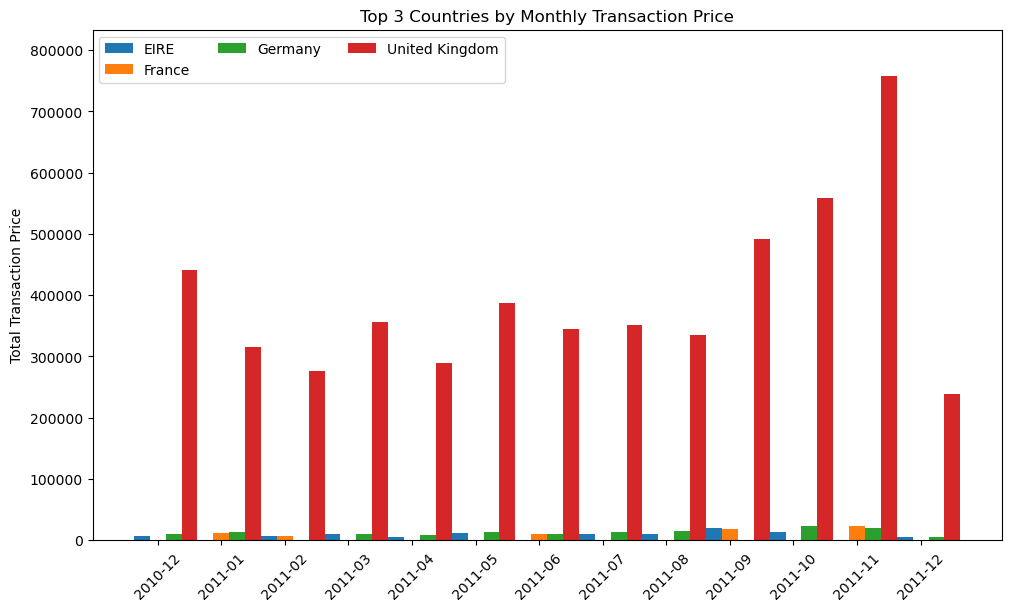

In [50]:
# Assuming your data is named 'filtered_data' and has a 'transaction_price', 'Country', and 'InvoiceDate' column
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Create a 'Month' column for grouping
filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M')

# Group by month and country, summing the 'transaction_price' for each
monthly_country_sum = filtered_data.groupby(['Month', 'Country'])['transaction_price'].sum().reset_index()

# Find the top 3 countries for each month based on the sum of 'transaction_price'
top3_countries_per_month = monthly_country_sum.groupby('Month').apply(
    lambda x: x.nlargest(3, 'transaction_price')
).reset_index(drop=True)

# Pivot the data for plotting (with months as x-axis and top 3 countries per month as bars)
pivot_data = top3_countries_per_month.pivot(index='Month', columns='Country', values='transaction_price').fillna(0)

# Set up the bar chart
months = pivot_data.index.astype(str)
countries = pivot_data.columns
x = np.arange(len(months))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Plot each country's bar for each month
for country in countries:
    offset = width * multiplier
    rects = ax.bar(x + offset, pivot_data[country], width, label=country)
    # Remove this line to stop showing the numbers on top of the bars
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add labels and formatting
ax.set_ylabel('Total Transaction Price')
ax.set_title('Top 3 Countries by Monthly Transaction Price')
ax.set_xticks(x + width, months, rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, pivot_data.max().max() * 1.1)  # Set y-limit slightly above the max value

plt.show()

As we can see, the United Kingdom is by far the most significant market for our store. Therefore, moving forward, we will focus exclusively on the United Kingdom. Next, we aim to identify the most important products. To achieve this, we will create a graph displaying the top 10 products based on their total transaction value.

In [99]:
# Remove rows where 'Country' is not the UK
filtered_data = filtered_data[filtered_data['Country'] == "United Kingdom"]

# Display the number of remaining rows in the new filtered data
print(f"Number of rows after filtering: {len(filtered_data)}")

Number of rows after filtering: 438576


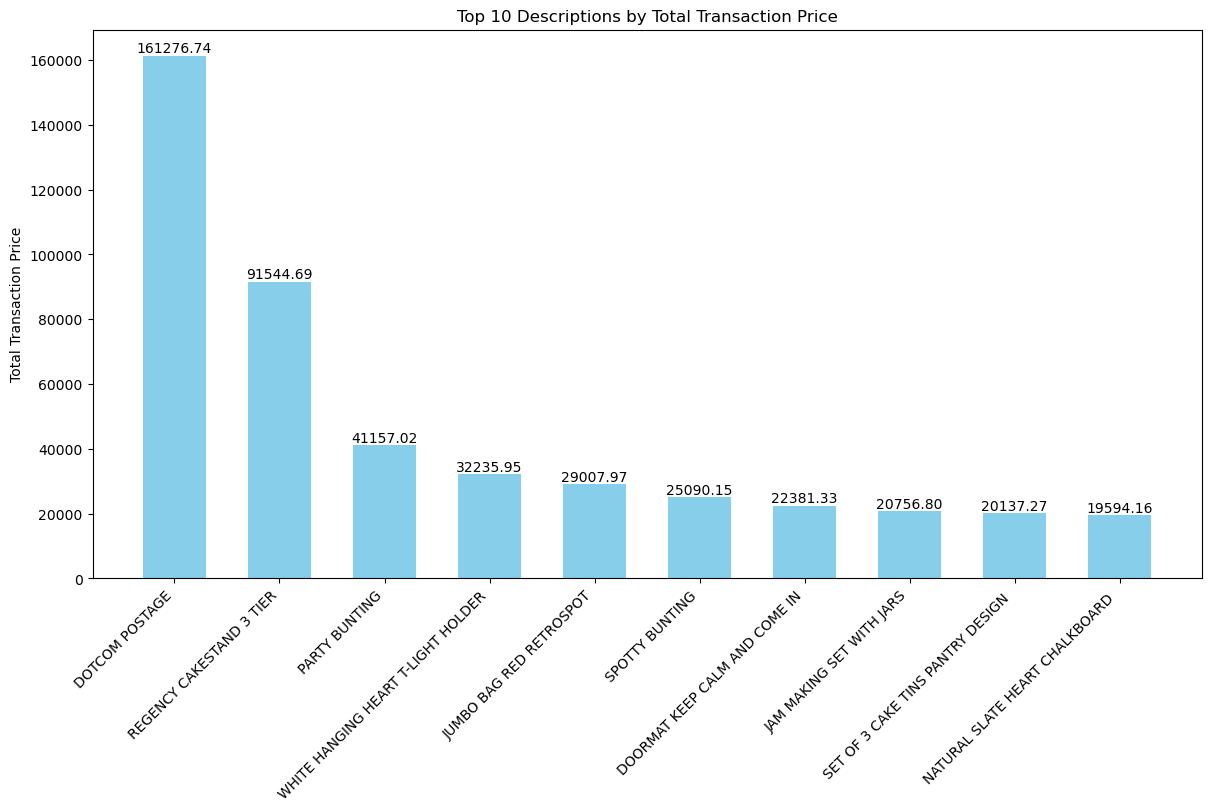

In [57]:
# Assuming your data is named 'filtered_data' and has 'transaction_price', 'Description', and 'InvoiceDate' columns
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Group by description and sum the 'transaction_price'
description_sum = filtered_data.groupby('Description')['transaction_price'].sum().reset_index()

# Get the top 10 descriptions based on the sum of 'transaction_price'
top10_descriptions = description_sum.nlargest(10, 'transaction_price')

# Sort the top 10 descriptions in descending order
top10_descriptions = top10_descriptions.sort_values(by='transaction_price', ascending=False)

# Set up the bar chart
descriptions = top10_descriptions['Description']
transaction_prices = top10_descriptions['transaction_price']
x = np.arange(len(descriptions))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8), layout='constrained')

# Plot bars
rects = ax.bar(x, transaction_prices, width, color='skyblue')

# Add labels and formatting
ax.set_ylabel('Total Transaction Price')
ax.set_title('Top 10 Descriptions by Total Transaction Price')
ax.set_xticks(x)
ax.set_xticklabels(descriptions, rotation=45, ha='right')

# Optional: Add value labels on top of bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

We see that the product with the highest transaction value is 'dotcom postage.' This is not surprising, as customers often pay such taxes. However, this product is not relevant to our research. Therefore, we will remove it from our data and focus on the remaining products. It's important to note that this change does not affect the fact that the UK remains the country with the highest transaction value.

In [87]:
# Assuming filtered_data is your DataFrame
filtered_data = filtered_data[filtered_data['Description'] != 'dotcom postage']

# Display the number of remaining rows in the new filtered data
print(f"Number of rows after filtering: {len(filtered_data)}")

Number of rows after filtering: 473241


## Analysis of Key Products

We identified that the key product is the "Regency Cakestand 3 Tier." Next, we will analyze the performance and behavior of this product.

C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\147498084.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cakestand_median = cakestand_data.groupby('DayOfWeek').median().reindex([


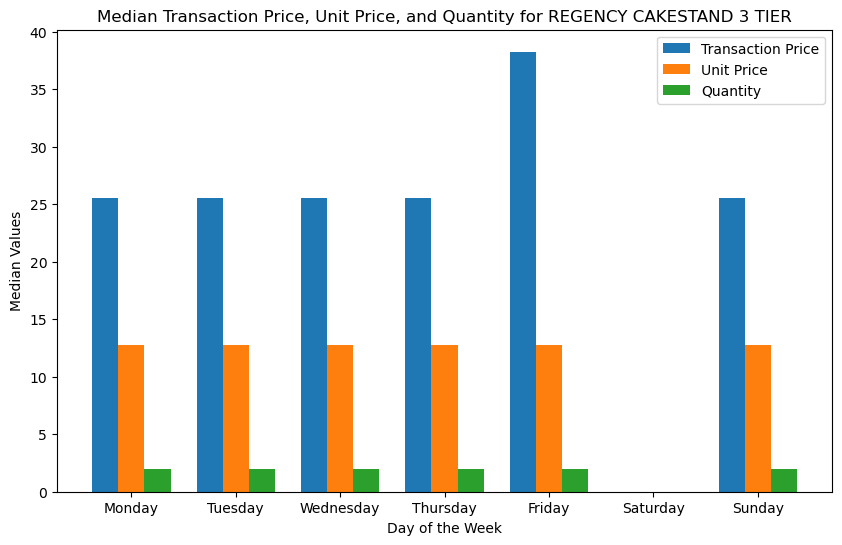

In [66]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Extract day of the week (0=Monday, 6=Sunday)
filtered_data['DayOfWeek'] = filtered_data['InvoiceDate'].dt.day_name()

# Filter data for "REGENCY CAKESTAND 3 TIER"
cakestand_data = filtered_data[filtered_data['Description'] == "REGENCY CAKESTAND 3 TIER"]

# Calculate the median for 'transaction_price', 'UnitPrice', and 'Quantity' for each day of the week
cakestand_median = cakestand_data.groupby('DayOfWeek').median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).fillna(0)

# Prepare data for plotting
days_of_week = cakestand_median.index
transaction_price_median = cakestand_median['transaction_price']
unit_price_median = cakestand_median['UnitPrice']
quantity_median = cakestand_median['Quantity']

# Plot setup
dim = 3  # Three sets of bars (for transaction_price, UnitPrice, and Quantity)
w = 0.75  # Total bar width
dimw = w / dim  # Width of each individual bar

fig, ax = plt.subplots(figsize=(10, 6))  # Create larger plot
x = np.arange(len(days_of_week))  # X-axis positions

# Plot the bars for transaction_price, UnitPrice, and Quantity
rects1 = ax.bar(x, transaction_price_median, dimw, label='Transaction Price')
rects2 = ax.bar(x + dimw, unit_price_median, dimw, label='Unit Price')
rects3 = ax.bar(x + 2 * dimw, quantity_median, dimw, label='Quantity')

# Add labels and formatting
ax.set_xticks(x + dimw)
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Median Values')
ax.set_title('Median Transaction Price, Unit Price, and Quantity for REGENCY CAKESTAND 3 TIER')
ax.legend()

# Show the plot
plt.show()


As we can see, the data for 'REGENCY CAKESTAND 3 TIER' doesn’t vary significantly across days. However, it might be interesting to explore the potential impact of adjusting prices on specific days. Perhaps offering discounts on select days could prove to be a more strategic approach for the store.

C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\1017427689.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cakestand_median = cakestand_data.groupby('Month').median().fillna(0)


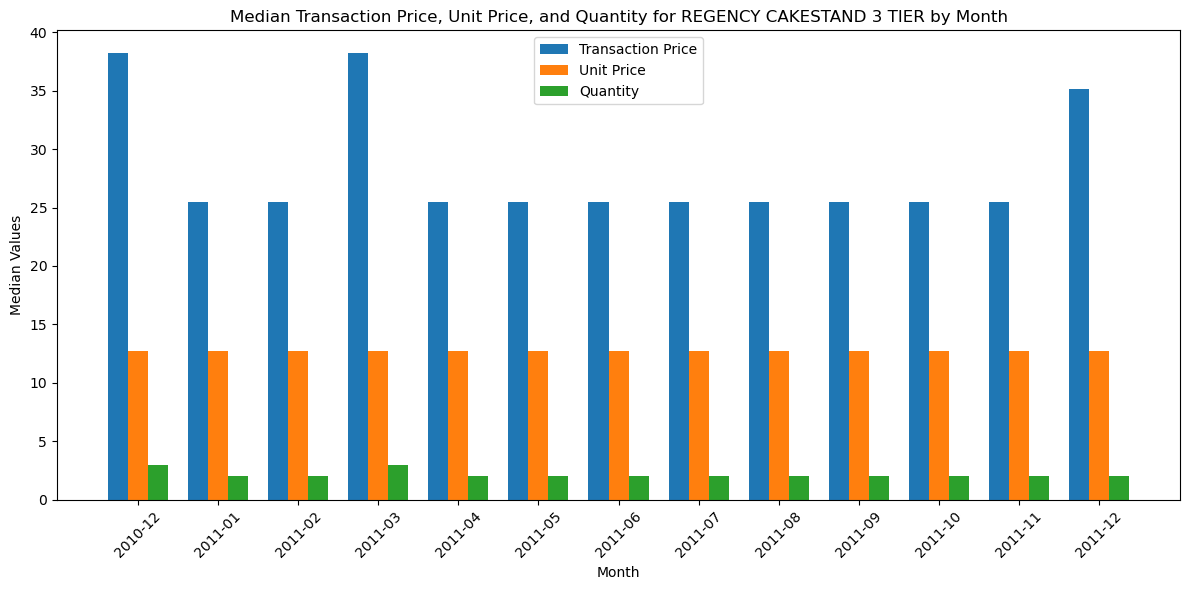

In [67]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Extract month (in YYYY-MM format) from 'InvoiceDate'
filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M').astype(str)

# Filter data for "REGENCY CAKESTAND 3 TIER"
cakestand_data = filtered_data[filtered_data['Description'] == "REGENCY CAKESTAND 3 TIER"]

# Calculate the median for 'transaction_price', 'UnitPrice', and 'Quantity' for each month
cakestand_median = cakestand_data.groupby('Month').median().fillna(0)

# Prepare data for plotting
months = cakestand_median.index
transaction_price_median = cakestand_median['transaction_price']
unit_price_median = cakestand_median['UnitPrice']
quantity_median = cakestand_median['Quantity']

# Plot setup
dim = 3  # Three sets of bars (for transaction_price, UnitPrice, and Quantity)
w = 0.75  # Total bar width
dimw = w / dim  # Width of each individual bar

fig, ax = plt.subplots(figsize=(12, 6))  # Create larger plot
x = np.arange(len(months))  # X-axis positions

# Plot the bars for transaction_price, UnitPrice, and Quantity
rects1 = ax.bar(x, transaction_price_median, dimw, label='Transaction Price')
rects2 = ax.bar(x + dimw, unit_price_median, dimw, label='Unit Price')
rects3 = ax.bar(x + 2 * dimw, quantity_median, dimw, label='Quantity')

# Add labels and formatting
ax.set_xticks(x + dimw)
ax.set_xticklabels(months, rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Median Values')
ax.set_title('Median Transaction Price, Unit Price, and Quantity for REGENCY CAKESTAND 3 TIER by Month')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


We observe that there is little variation in the data even when analyzed across different months.
Now, let’s examine how the results change when we analyze all products instead of focusing solely on the "REGENCY CAKESTAND 3 TIER.

C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\629298623.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_data = filtered_data.groupby('Month').median().fillna(0)


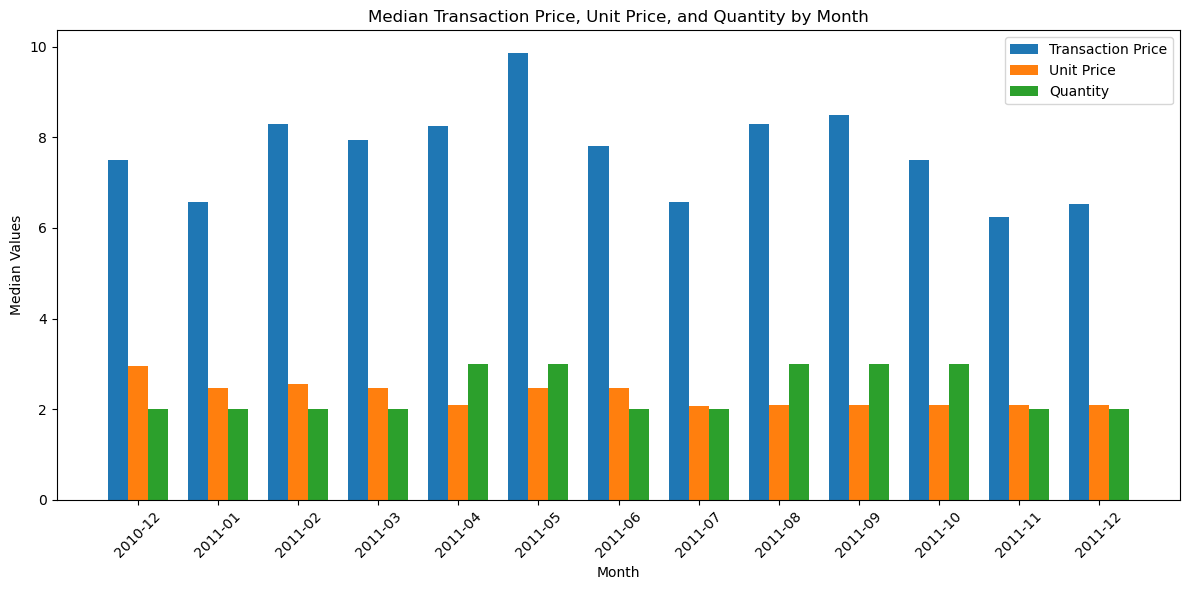

In [90]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Extract month (in YYYY-MM format) from 'InvoiceDate'
filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M').astype(str)

# Calculate the median for 'transaction_price', 'UnitPrice', and 'Quantity' for each month
filtered_data_2 = filtered_data.groupby('Month').median().fillna(0)

# Prepare data for plotting
months = filtered_data_2.index
transaction_price_median = filtered_data_2['transaction_price']
unit_price_median = filtered_data_2['UnitPrice']
quantity_median = filtered_data_2['Quantity']

# Plot setup
dim = 3  # Three sets of bars (for transaction_price, UnitPrice, and Quantity)
w = 0.75  # Total bar width
dimw = w / dim  # Width of each individual bar

fig, ax = plt.subplots(figsize=(12, 6))  # Create larger plot
x = np.arange(len(months))  # X-axis positions

# Plot the bars for transaction_price, UnitPrice, and Quantity
rects1 = ax.bar(x, transaction_price_median, dimw, label='Transaction Price')
rects2 = ax.bar(x + dimw, unit_price_median, dimw, label='Unit Price')
rects3 = ax.bar(x + 2 * dimw, quantity_median, dimw, label='Quantity')

# Add labels and formatting
ax.set_xticks(x + dimw)
ax.set_xticklabels(months, rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Median Values')
ax.set_title('Median Transaction Price, Unit Price, and Quantity by Month')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\4229536174.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = filtered_data.groupby('DayOfWeek').median().reindex([


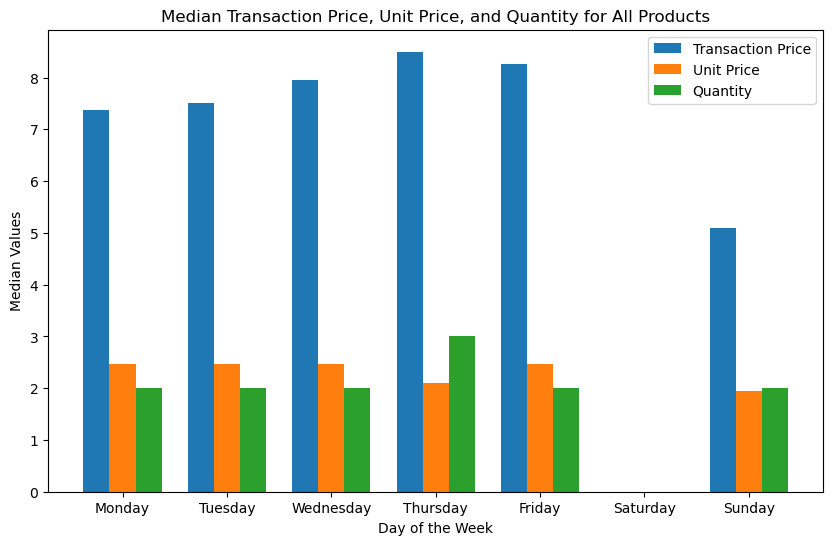

In [100]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Extract day of the week
filtered_data['DayOfWeek'] = filtered_data['InvoiceDate'].dt.day_name()

# Calculate the median for 'transaction_price', 'UnitPrice', and 'Quantity' for each day of the week
median_values = filtered_data.groupby('DayOfWeek').median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).fillna(0)

# Prepare data for plotting
days_of_week = median_values.index
transaction_price_median = median_values['transaction_price']
unit_price_median = median_values['UnitPrice']
quantity_median = median_values['Quantity']

# Plot setup
dim = 3  # Three sets of bars (for transaction_price, UnitPrice, and Quantity)
w = 0.75  # Total bar width
dimw = w / dim  # Width of each individual bar

fig, ax = plt.subplots(figsize=(10, 6))  # Create larger plot
x = np.arange(len(days_of_week))  # X-axis positions

# Plot the bars for transaction_price, UnitPrice, and Quantity
rects1 = ax.bar(x, transaction_price_median, dimw, label='Transaction Price')
rects2 = ax.bar(x + dimw, unit_price_median, dimw, label='Unit Price')
rects3 = ax.bar(x + 2 * dimw, quantity_median, dimw, label='Quantity')

# Add labels and formatting
ax.set_xticks(x + dimw)
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Median Values')
ax.set_title('Median Transaction Price, Unit Price, and Quantity for All Products')
ax.legend()

# Show the plot
plt.show()

We observe that the median values for the products show little variation across different days and months.
Let's examine how the price impacts the quantity. We'll first analyze this relationship for the product 'REGENCY CAKESTAND 3 TIER,' and then extend the analysis to all products.

In [103]:
filtered_data_3 = filtered_data[filtered_data['Description'] == 'REGENCY CAKESTAND 3 TIER']
result = sm.ols(formula="Quantity ~ UnitPrice ", data=filtered_data_3).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     60.41
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.36e-14
Time:                        15:17:52   Log-Likelihood:                -4834.1
No. Observations:                1634   AIC:                             9672.
Df Residuals:                    1632   BIC:                             9683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0259      0.383     18.329      0.0

In [104]:
result_2 = sm.ols(formula="Quantity ~ UnitPrice ", data=filtered_data).fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4173.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:18:45   Log-Likelihood:            -1.2602e+06
No. Observations:              438576   AIC:                         2.520e+06
Df Residuals:                  438574   BIC:                         2.520e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5714      0.007    679.227      0.0

We observe that the quantity of 'REGENCY CAKESTAND 3 TIER' is less sensitive to changes in price compared to other products.
Next, we will observe the variations across the different days of the week.

In [106]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

# Extract day of the week (0=Monday, 6=Sunday)
filtered_data['DayOfWeek'] = filtered_data['InvoiceDate'].dt.day_name()

# Create new columns for each day of the week, with 1 if it's that day, else 0
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days_of_week:
    filtered_data[day] = (filtered_data['DayOfWeek'] == day).astype(int)
filtered_data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_price,DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,0,0,1,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,0,0,1,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,0,0,1,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,0,0,1,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,0,0,1,0,0,0,0


In [112]:
# Convert 'InvoiceDate' to datetime format if it's not already
filtered_data_3['InvoiceDate'] = pd.to_datetime(filtered_data_3['InvoiceDate'])

# Extract day of the week (0=Monday, 6=Sunday)
filtered_data_3['DayOfWeek'] = filtered_data_3['InvoiceDate'].dt.day_name()

# Create new columns for each day of the week, with 1 if it's that day, else 0
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days_of_week:
    filtered_data_3[day] = (filtered_data_3['DayOfWeek'] == day).astype(int)
filtered_data_3.head() 

C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\4211416292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_3['InvoiceDate'] = pd.to_datetime(filtered_data_3['InvoiceDate'])
C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\4211416292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_3['DayOfWeek'] = filtered_data_3['InvoiceDate'].dt.day_name()
C:\Users\kruvi\AppData\Local\Temp\ipykernel_16624\4211416292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_price,DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-01 12:27:00,10.95,16210.0,United Kingdom,175.20,Wednesday,0,0,1,0,0,0,0
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:36:00,12.75,16552.0,United Kingdom,25.50,Wednesday,0,0,1,0,0,0,0
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:54:00,12.75,14078.0,United Kingdom,25.50,Wednesday,0,0,1,0,0,0,0
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:17:00,12.75,15525.0,United Kingdom,12.75,Wednesday,0,0,1,0,0,0,0
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:21:00,12.75,17905.0,United Kingdom,12.75,Wednesday,0,0,1,0,0,0,0


In [114]:
result_3 = sm.ols(formula="Quantity ~ UnitPrice + Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday ", data=filtered_data_3).fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.64
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           8.54e-13
Time:                        12:38:08   Log-Likelihood:                -4829.5
No. Observations:                1634   AIC:                             9673.
Df Residuals:                    1627   BIC:                             9711.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7400      0.473     14.236      0.0

C:\Users\kruvi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [115]:
result_4 = sm.ols(formula="Quantity ~ UnitPrice + Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday ", data=filtered_data).fit()
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     988.8
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:38:49   Log-Likelihood:            -1.2593e+06
No. Observations:              438576   AIC:                         2.519e+06
Df Residuals:                  438569   BIC:                         2.519e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3515      0.015    282.307      0.0

We can observe that Sundays generally have a lower average quantity per sale across all products, particularly for the 'REGENCY CAKESTAND 3 TIER.'

In [117]:
 result_5 = sm.ols(formula="UnitPrice ~ Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday ", data=filtered_data_3).fit()
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     10.37
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           8.22e-10
Time:                        12:41:43   Log-Likelihood:                -4762.8
No. Observations:                1634   AIC:                             9538.
Df Residuals:                    1628   BIC:                             9570.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6192      0.274     53.325      0.0

C:\Users\kruvi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [118]:
result_6 = sm.ols(formula="UnitPrice ~ Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday ", data=filtered_data).fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     80.19
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           2.03e-84
Time:                        12:41:45   Log-Likelihood:            -1.7638e+06
No. Observations:              438576   AIC:                         3.528e+06
Df Residuals:                  438570   BIC:                         3.528e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1353      0.048     85.630      0.0

C:\Users\kruvi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


We can observe that Sunday has the lowest average price compared to other days.

## Conclusion

In this analysis, we identified key insights about the website's transactions. The most significant cost for customers is 'Dotcom postage', although it is not a typical product but rather a service charge. Among the actual products, the most important ones are 'Regency Cakestand 3 Tier', 'Party Bunting', and 'White Hanging Heart T-Light Holder'. Additionally, the vast majority of transactions are made in the UK, confirming its central role in the site's customer base.

Interestingly, Sunday stands out as the day with the lowest average prices, and customers tend to purchase fewer items per transaction on this day. However, despite these variations in pricing and quantity, the total value of transactions remains fairly consistent across different days of the week and throughout the months, indicating that the overall revenue is not significantly affected by these fluctuations in behavior.